# 回归模型demo

## 线性回归

In [1]:
# 线性回归
from sklearn.linear_model import LinearRegression as LR
#划分训练集和测试集
from sklearn.model_selection import train_test_split
#交叉验证
from sklearn.model_selection import cross_val_score
#加利福尼亚房屋价值数据集
from sklearn.datasets import fetch_california_housing as fch 
import pandas as pd

In [2]:
housingvalue=fch()
X=pd.DataFrame(housingvalue.data)
y=housingvalue.target

In [3]:
X.columns=housingvalue.feature_names

In [4]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [5]:
#划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
#恢复索引
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
Xtrain.shape

(14448, 8)

In [6]:
#训练模型
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [7]:
# reg.coef_
print(reg.intercept_)
[*zip(X.columns,reg.coef_)]

-36.25689322920392


[('MedInc', 0.4373589305968405),
 ('HouseAge', 0.010211268294494077),
 ('AveRooms', -0.10780721617317687),
 ('AveBedrms', 0.6264338275363769),
 ('Population', 5.216125353157005e-07),
 ('AveOccup', -0.0033485096463335183),
 ('Latitude', -0.41309593789477167),
 ('Longitude', -0.42621095362084743)]

## 回归类模型评估指标

回归类算法的模型评估一直都是回归算法中的一个难点，但不像我们曾经讲过的无监督学习算法中的轮廓系数等等评  
估指标，回归类与分类型算法的模型评估其实是相似的法则——找真实标签和预测值的差异。只不过在分类型算法  
中，这个差异只有一种角度来评判，那就是是否预测到了正确的分类，而在我们的回归类算法中，我们有两种不同的  
角度来看待回归的效果：  
第一，我们是否预测到了正确的数值。  
第二，我们是否拟合到了足够的信息。  
这两种角度，分别对应着不同的模型评估指标。  

### 是否预测了正确的数值

In [8]:
from sklearn.metrics import mean_squared_error as MSE
print(MSE(yhat,Ytest))
print(y.min())
print(y.max())


0.5309012639324568
0.14999
5.00001


In [9]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [10]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error").mean()

-0.5509524296956602

### 是否拟合到了足够的信息

In [11]:
#调用R2
from sklearn.metrics import r2_score
r2_score(Ytest,yhat)

0.6043668160178819

In [19]:
r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178819

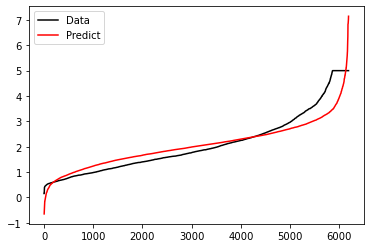

In [12]:
import matplotlib.pyplot as plt
sorted(Ytest)
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

## 岭回归

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data) 
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"] 
X.head()
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #数据集索引恢复
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [14]:
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)

In [15]:
reg.intercept_

-36.25220555569573

In [16]:
reg.score(Xtest,Ytest) #交叉验证下，与线性回归相比，岭回归的结果如何变化？

0.6043610352312279

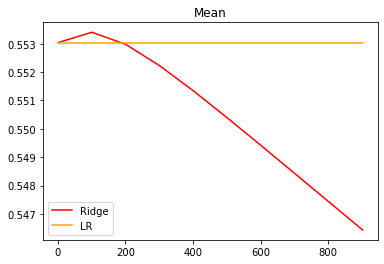

In [17]:

alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()
#细化一下学习曲线
alpharange = np.arange(1,201,10)

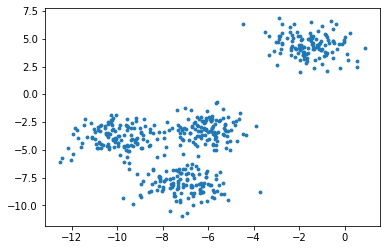

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#自己创建数据集
X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)
fig, ax1 = plt.subplots(1)
ax1.scatter(X[:, 0], X[:, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            )
plt.show()


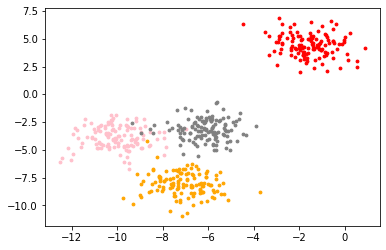

In [19]:
#如果我们想要看见这个点的分布，怎么办？
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(X[y==i, 0], X[y==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i]
            )
plt.show()